In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import scipy.signal as signal
from IPython.display import Audio

In [10]:
# load the file
matfile = loadmat('glassDance.mat')
# this is a clip of Philip Glass, Dance VII (https://www.youtube.com/watch?v=LpewOlR-z_4)

glassclip = matfile['glassclip']
srate = matfile['srate'][0][0]

# play the music!
Audio(np.array(glassclip[:,0]), rate=srate)


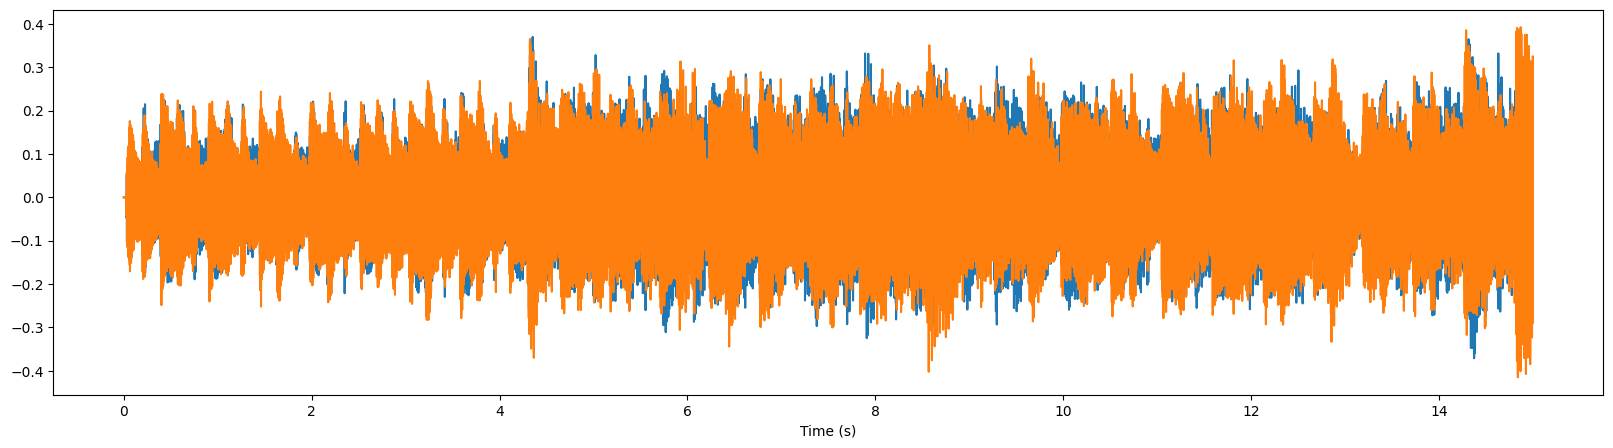

In [11]:
# some variables for convenience
pnts = len(glassclip)
timevec = np.arange(0,pnts)/srate


# draw the time-domain signals
plt.figure(figsize=(20,5))
plt.plot(timevec,glassclip)
plt.xlabel('Time (s)')
plt.show()

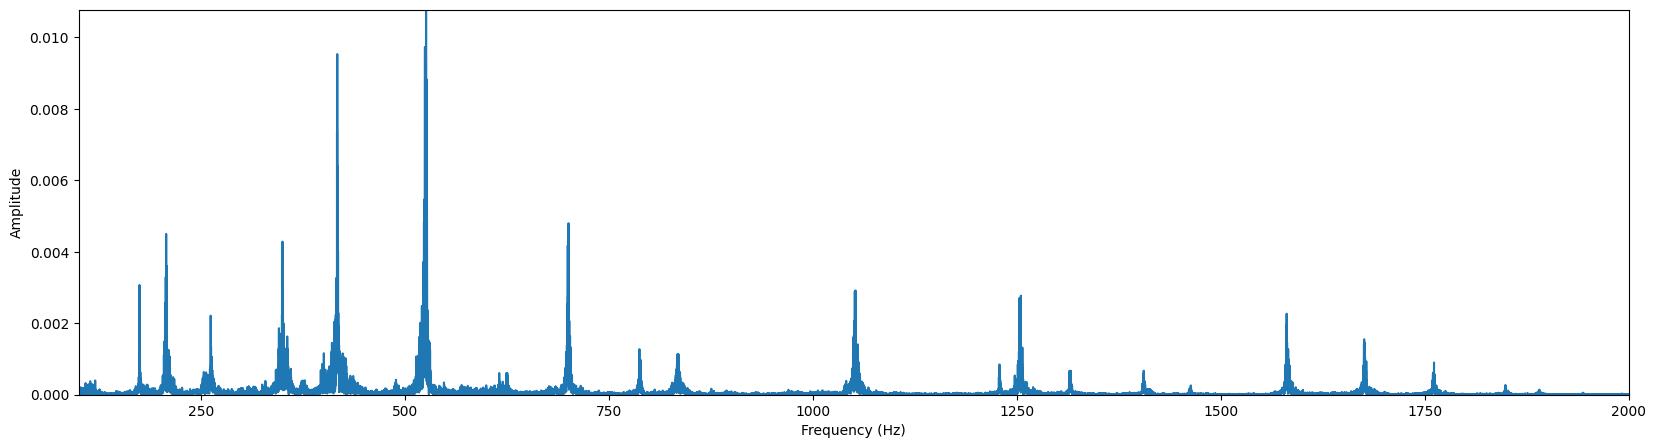

In [12]:
## static power spectrum and pick a frequency range

# inspect the power spectrum
hz = np.linspace(0,srate/2,int(np.floor(len(glassclip)/2)+1))
powr = abs(np.fft.fft(glassclip[:,0])/pnts)

# make figure wider
plt.figure(figsize=(20,5))
plt.plot(hz,powr[:len(hz)])

plt.xlim([100,2000])
plt.ylim([0,np.max(powr)])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()


In [30]:
# pick frequencies to filter
# frange = [  300,  460 ]
# frange = [ 1000, 1100 ]
# frange = [ 1200, 1450 ]
frange = [ 20, 2000 ]


# design an FIR1 filter
fkern = signal.firwin(2001,frange,fs=srate/2,pass_zero=False)

# apply the filter to the signal
filtglass = np.zeros(np.shape(glassclip))
filtglass[:,0] = signal.filtfilt(fkern,1,glassclip[:,0])
filtglass[:,1] = signal.filtfilt(fkern,1,glassclip[:,1])


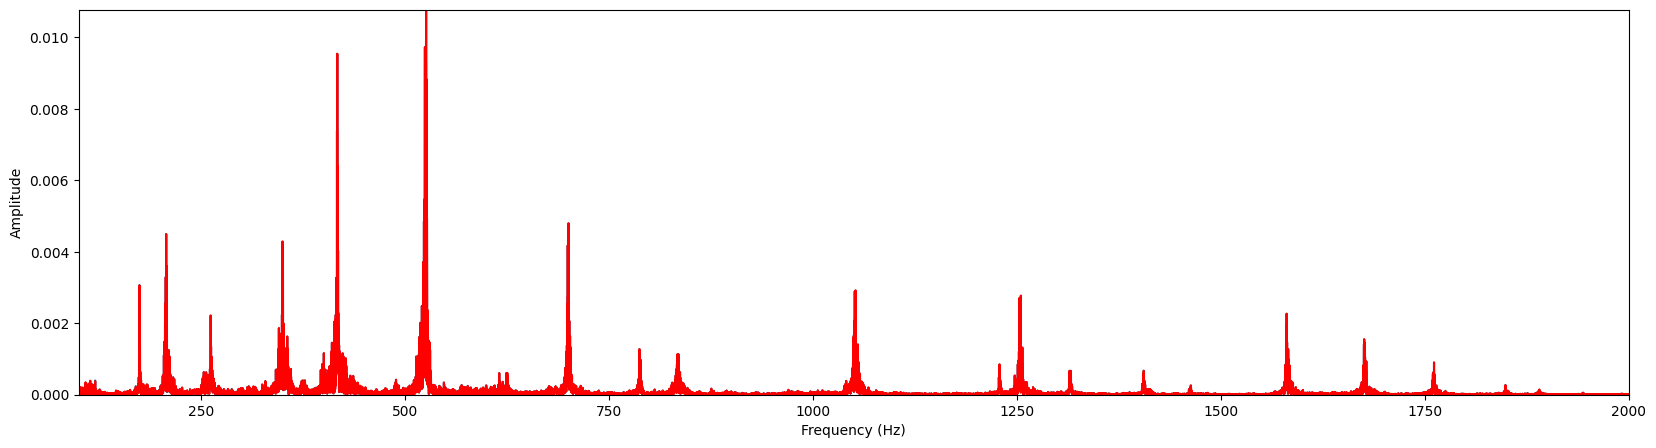

In [31]:
## plot the raw and filtered signal power spectra
powrF = abs(np.fft.fft(filtglass[:,0])/pnts)

plt.figure(figsize=(20,5))
plt.plot(hz,powr[:len(hz)])
plt.plot(hz,powrF[:len(hz)],'r')

plt.xlim([100,2000])
plt.ylim([0,np.max(powr)])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

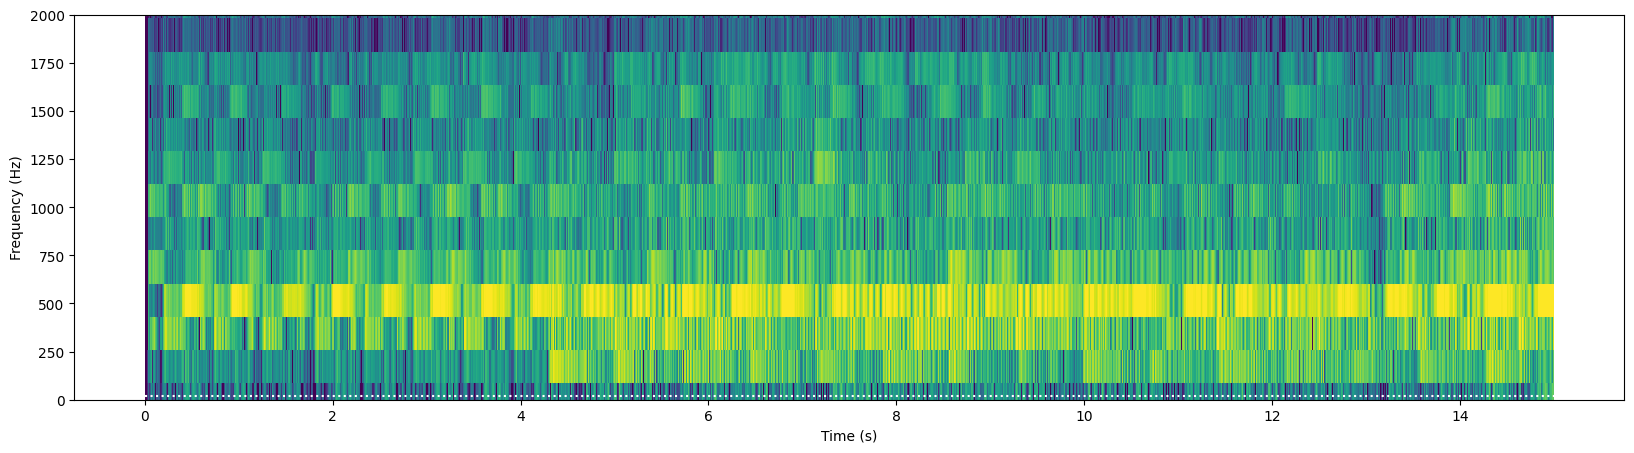

In [32]:
# plot the time-frequency response

frex,time,tf = signal.spectrogram(glassclip[:,0],window=('tukey',.25),fs=srate,noverlap=100)

plt.figure(figsize=(20,5))
plt.plot([timevec[0],timevec[-1]],[frange[0],frange[0]],'w:')
plt.plot([timevec[0],timevec[-1]],[frange[1],frange[1]],'w:')

plt.pcolormesh(time,frex,np.log(tf),vmin=-20,vmax=-10)
plt.ylim([0,2000])
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

In [33]:
## Play the filtered signal!
Audio(np.array(filtglass[:,0]), rate=srate)